<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/ud_l5_cnn_dogs_v_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.nn import relu,softmax
from __future__ import absolute_import,print_function,division
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt
import numpy as np


In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filterted.zip',origin=_URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [4]:
zip_dir_name=os.path.dirname(zip_dir)
!find $zip_dir_name -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
num_cats_tr=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/train/cats'))
num_dogs_tr=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/train/dogs'))
num_cats_val=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/validation/cats'))
num_dogs_val=len(os.listdir('/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs'))

In [6]:
print('number of cat examples in train dataset: {}'.format(num_cats_tr))
print('number of dog examples in train dataset: {}'.format(num_dogs_tr))
print('number of cat examples in validation dataset: {}'.format(num_cats_val))
print('number of dog examples in validation dataset: {}'.format(num_dogs_val))

number of cat examples in train dataset: 1000
number of dog examples in train dataset: 1000
number of cat examples in validation dataset: 500
number of dog examples in validation dataset: 500


In [7]:
BATCH_SIZE=100
IMG_SHAPE=150

In [8]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen=train_image_generator.flow_from_directory('/root/.keras/datasets/cats_and_dogs_filtered/train/',
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         class_mode='binary'                                                      
                                                         )
validation_data_gen=train_image_generator.flow_from_directory('/root/.keras/datasets/cats_and_dogs_filtered/validation/',
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=False,
                                                         class_mode='binary'                                                         
                                                         )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
sample_training_images,_=train_data_gen.next()

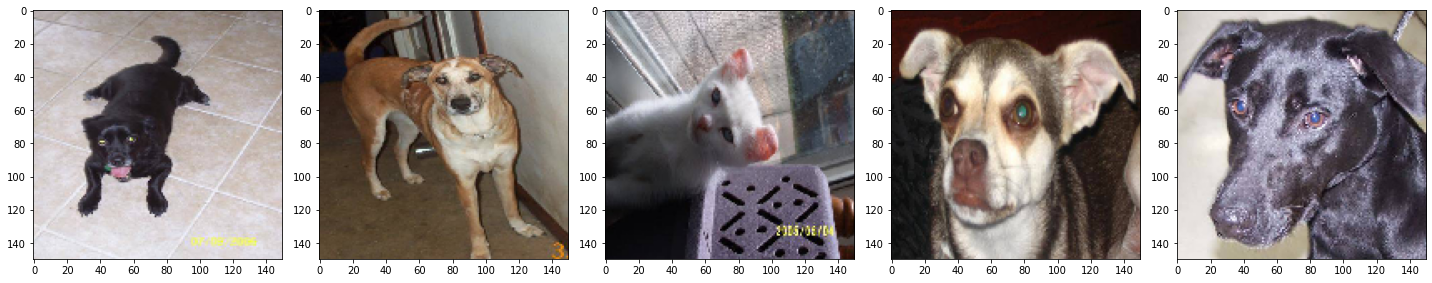

In [12]:
plotImages(sample_training_images[:5])

In [13]:
model=tf.keras.Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                           MaxPooling2D((2,2)),

                           Conv2D(64,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Conv2D(128,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Conv2D(128,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Flatten(),
                           Dense(512,activation='relu'),
                           Dense(2,activation='softmax')])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
#model.fit_generator(train_data_gen,
                    steps_per_epoch=int(np.ceil((num_dogs_tr+num_cats_tr)/BATCH_SIZE)),
                    epochs=100,
                    validation_data=validation_data_gen,
                    validation_steps=int(np.ceil((num_dogs_val+num_cats_val)/BATCH_SIZE)))

### **Data augmentaton and Dop out**

In [43]:
image_gen_train=ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

In [44]:
train_data_gen=image_gen_train.flow_from_directory('/root/.keras/datasets/cats_and_dogs_filtered/train/',batch_size=BATCH_SIZE,shuffle=True,target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='binary')

Found 2000 images belonging to 2 classes.


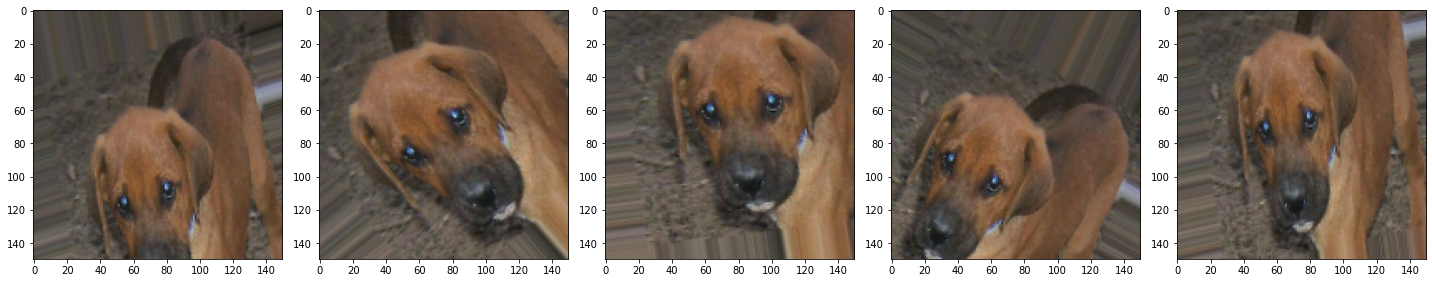

In [46]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [47]:
image_gen_val = ImageDataGenerator(rescale=1/.255)

In [48]:
val_data_gen=image_gen_val.flow_from_directory('/root/.keras/datasets/cats_and_dogs_filtered/validation/',batch_size=BATCH_SIZE,target_size=(IMG_SHAPE,IMG_SHAPE))

Found 1000 images belonging to 2 classes.


In [55]:
model=tf.keras.Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                           MaxPooling2D((2,2)),

                           Conv2D(64,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Conv2D(128,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),

                           Conv2D(128,(3,3),activation='relu'),
                           MaxPooling2D((2,2)),
                           Dropout(0.5),
                           Flatten(),
                           Dense(512,activation='relu'),
                           Dense(2,activation='softmax')])

In [56]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [59]:
epochs=100
history=model.fit_generator(train_data_gen,steps_per_epoch=int(np.ceil((num_dogs_tr+num_cats_tr)/BATCH_SIZE)),
                    epochs=epochs,
                    validation_data=validation_data_gen,
                    validation_steps=int(np.ceil((num_dogs_val+num_cats_val)/BATCH_SIZE)))

Epoch 1/100
20/20 [==============================] - 18s 895ms/step - loss: 0.7507 - accuracy: 0.5090 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 18s 886ms/step - loss: 0.6922 - accuracy: 0.5065 - val_loss: 0.6927 - val_accuracy: 0.5290
Epoch 3/100
20/20 [==============================] - 18s 884ms/step - loss: 0.6926 - accuracy: 0.5185 - val_loss: 0.6928 - val_accuracy: 0.5070
Epoch 4/100
20/20 [==============================] - 18s 892ms/step - loss: 0.6901 - accuracy: 0.5340 - val_loss: 0.6784 - val_accuracy: 0.6160
Epoch 5/100
20/20 [==============================] - 18s 890ms/step - loss: 0.6905 - accuracy: 0.5480 - val_loss: 0.6794 - val_accuracy: 0.6100
Epoch 6/100
20/20 [==============================] - 18s 885ms/step - loss: 0.6873 - accuracy: 0.5570 - val_loss: 0.6801 - val_accuracy: 0.5540
Epoch 7/100
20/20 [==============================] - 18s 884ms/step - loss: 0.6792 - accuracy: 0.5790 - val_loss: 0.6498 - val_accuracy:

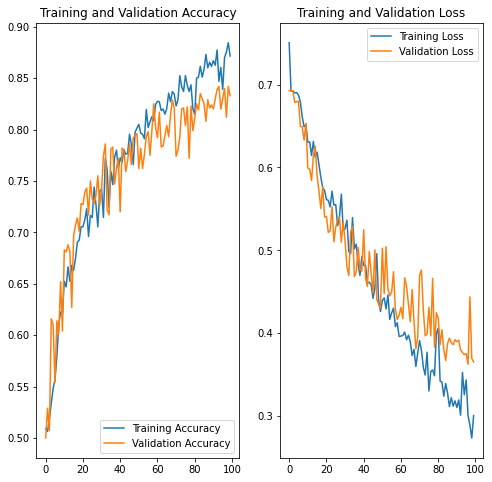

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()